In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 100
import sparsetools as sp
from matplotlib.colors import LogNorm

In [11]:
obs = sp.profile('obs/ibis_alma6mod_alma3syn_obs.nc').extractPix(x1=320,y1=320)
fit_none = sp.profile('nlte/nlte_fit_2_filt.nc').extractPix(x1=320,y1=320)
mod_none = sp.model('nlte/nlte_mod_2_filt.nc').extract(x1=320,y1=320)
fit_alma3 = sp.profile('alma3syn/ibis_alma3syn_fit_2.nc').extractPix(x1=320,y1=320)
mod_alma3 = sp.model('alma3syn/ibis_alma3syn_mod_2.nc').extract(x1=320,y1=320)
fit_alma6 = sp.profile('alma6/ibis_alma6mod_fit_2.nc').extractPix(x1=320,y1=320)
mod_alma6 = sp.model('alma6/ibis_alma6mod_mod_2.nc').extract(x1=320,y1=320)
fit_both = sp.profile('both/ibis_alma6mod_alma3syn_fit_2.nc').extractPix(x1=320,y1=320)
mod_both = sp.model('both/ibis_alma6mod_alma3syn_mod_2.nc').extract(x1=320,y1=320)

profile::setsize: nx=334, ny=334, nw=95, ns=1, nt=1
profile::read: [profiles][wav][weights][pixel_weights]
profile::setsize: nx=320, ny=320, nw=95, ns=4, nt=1
profile::setsize: nx=320, ny=320, nw=94, ns=1, nt=1
profile::read: [profiles][wav][weights][pixel_weights]
profile::setsize: nx=320, ny=320, nw=94, ns=4, nt=1
model::read: atmos type -> depth-stratified
model::read: nx=320, ny=320, ndep=61, nt=1
model::setSize: nx = 320, ny = 320, ndep = 61, nt = 1
model::extract: x=(0,320), y=(0,320), z=(0,61), t=(0,1)
model::setSize: nx = 320, ny = 320, ndep = 61, nt = 1
profile::setsize: nx=334, ny=334, nw=95, ns=1, nt=1
profile::read: [profiles][wav][weights][pixel_weights]
profile::setsize: nx=320, ny=320, nw=95, ns=4, nt=1
model::read: atmos type -> depth-stratified
model::read: nx=334, ny=334, ndep=61, nt=1
model::setSize: nx = 334, ny = 334, ndep = 61, nt = 1
model::extract: x=(0,320), y=(0,320), z=(0,61), t=(0,1)
model::setSize: nx = 320, ny = 320, ndep = 61, nt = 1
profile::setsize: nx=

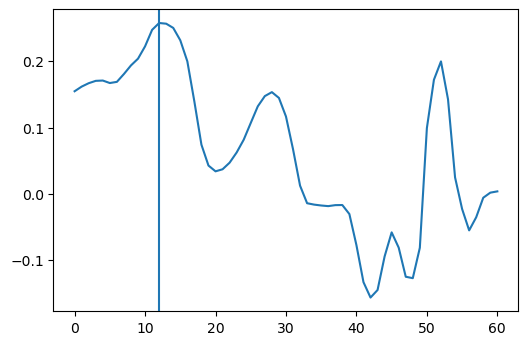

In [26]:
corr = np.zeros(61)
for i in range(61):
    corr[i] = np.corrcoef(obs.dat[0,:,:,-2,0].ravel(),mod_none.temp[0,:,:,i].ravel())[0,1]
plt.plot(corr)
plt.axvline(np.argmax(corr))

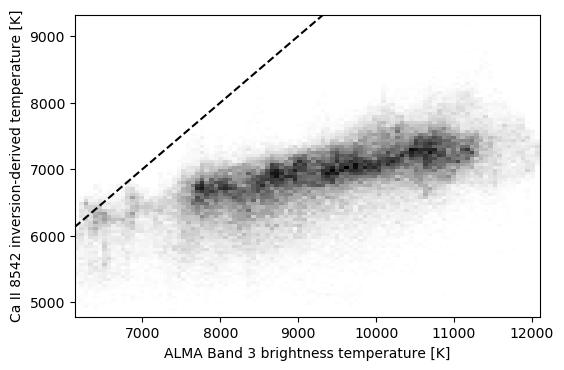

In [32]:
plt.hist2d(obs.dat[0,:,:,-1,0].ravel()*7300,mod_none.temp[0,:,:,13].ravel(),bins=100,cmap='gist_yarg')
plt.plot([5000,12000],[5000,12000],'--k')
plt.xlabel(r'ALMA Band 3 brightness temperature [K]')
plt.ylabel(r'Ca II 8542 inversion-derived temperature [K]')
plt.savefig('inversion_vs_alma3.png')

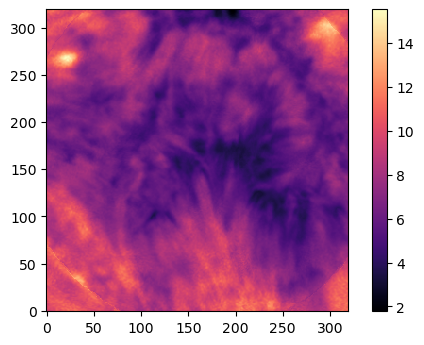

In [41]:
plt.imshow(obs.dat[0,:,:,-2,0]/np.min(obs.dat[0,:,:,48:-2,0],2),origin='lower',cmap='magma')
plt.colorbar()

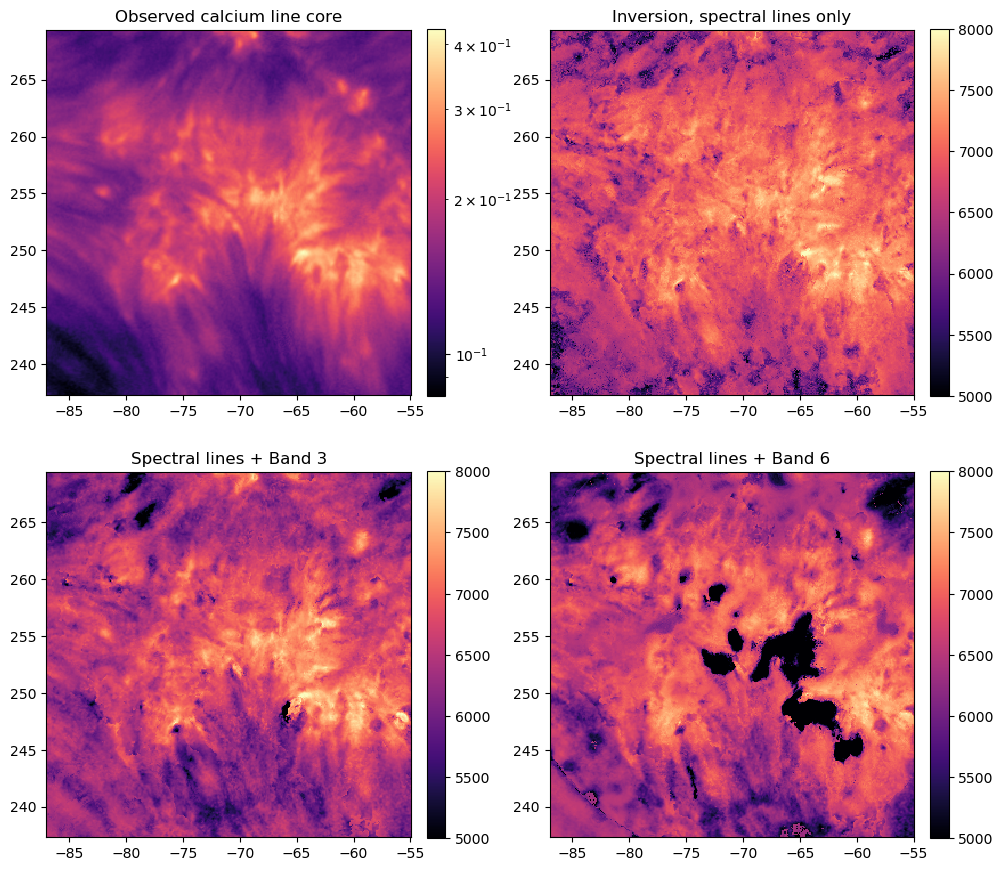

In [50]:
x0,y0 = -87.0, 237.3
w = 0.096*334
x1,y1 = x0+w,y0+w
plt.figure(figsize=(10,9))
plt.subplot(221)
plt.imshow(obs.dat[0,:,:,68,0],extent=[x0,x1,y0,y1],cmap='magma',origin='lower',norm=LogNorm())
plt.colorbar(fraction=0.046,pad=0.04)
plt.title('Observed calcium line core')
plt.subplot(222)
plt.imshow(mod_none.temp[0,:,:,14],extent=[x0,x1,y0,y1],cmap='magma',origin='lower',vmin=5000,vmax=8000)
plt.colorbar(fraction=0.046,pad=0.04)
plt.title('Inversion, spectral lines only')
plt.subplot(223)
plt.imshow(mod_alma3.temp[0,:,:,14],extent=[x0,x1,y0,y1],cmap='magma',origin='lower',vmin=5000,vmax=8000)
plt.colorbar(fraction=0.046,pad=0.04)
plt.title('Spectral lines + Band 3')
plt.subplot(224)
plt.imshow(mod_alma6.temp[0,:,:,14],extent=[x0,x1,y0,y1],cmap='magma',origin='lower',vmin=5000,vmax=8000)
plt.colorbar(fraction=0.046,pad=0.04)
plt.title('Spectral lines + Band 6')
plt.tight_layout()
plt.savefig('chromosphere_comparison.png')